In [1]:
import requests
import pandas as pd
import numpy as np

Importing the 311 Request data using a parameter dictionary to limit what exactly is pulled in, as well as using the direct API link from the data source to request the data in

In [2]:
params_dict = {
    '$where':'date_extract_y(open_date)<2023 and date_extract_y(open_date)>2016',
    '$limit':200000
}

uri = 'https://data.buffalony.gov/resource/whkc-e5vr.json'

r =requests.get(uri,params=params_dict)
print('Status code:',r.status_code)
print('Number of rows returned:',len(r.json()))
print('Endoced URI with params:',r.url)

Status code: 200
Number of rows returned: 200000
Endoced URI with params: https://data.buffalony.gov/resource/whkc-e5vr.json?%24where=date_extract_y%28open_date%29%3C2023+and+date_extract_y%28open_date%29%3E2016&%24limit=200000


In [3]:
ServiceRequests=pd.DataFrame(r.json())
print(ServiceRequests.shape)
ServiceRequests.tail()

(200000, 33)


,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,x_coordinate,y_coordinate,census_tract_2010,census_block_group_2010,census_block_2010,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,address_line_2
199995,1000852243,2018-05-10T12:23:00.000,2018-05-14T10:16:00.000,Closed,Dept of Public Works,Sanitation,Totes Pickup (Req_Serv),Property,43,ALTRURIA,...,-8775395,5288132,1.1,4,4002,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN
199996,1000900120,2018-09-18T10:34:00.000,2018-09-18T11:44:00.000,Closed,Buffalo Police Department,Police,Police Issue (Req_Serv),Property,INTERSECTION,W Utica St,...,1071406,1060867,66.02,2,2000,006602,36029006602,360290066022,360290066022003,Delaware Ave
199997,1000730875,2017-08-21T16:13:00.000,2017-09-19T12:07:00.000,Closed,DPIS,Housing,Housing Violations (Req_Serv),Property,420,HOPKINS,...,-8775703,5289032,1.1,3,3034,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN
199998,1000729454,2017-08-16T09:46:00.000,2017-09-06T11:48:00.000,Closed,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,444,HERKIMER,...,-8782276,5300569,171,4,4000,017100,36029017100,360290171004,360290171004000,NaN
199999,1000862603,2018-06-14T10:53:00.000,2018-06-28T16:16:00.000,Closed,DPIS,Housing,Housing Violations (Req_Serv),Property,105,DORRIS,...,-8773569,5300716,41,1,1006,004100,36029004100,360290041001,360290041001006,NaN


Updating the open_date column to date time to allow for simpler review of the data. I'll also be limiting to jsut the open_date column as that's all I'll need to perform the time series

In [4]:
ServiceRequests['open_date'] = pd.to_datetime(ServiceRequests['open_date']).dt.date
ServiceRequests.tail()

,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,x_coordinate,y_coordinate,census_tract_2010,census_block_group_2010,census_block_2010,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,address_line_2
199995,1000852243,2018-05-10,2018-05-14T10:16:00.000,Closed,Dept of Public Works,Sanitation,Totes Pickup (Req_Serv),Property,43,ALTRURIA,...,-8775395,5288132,1.1,4,4002,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN
199996,1000900120,2018-09-18,2018-09-18T11:44:00.000,Closed,Buffalo Police Department,Police,Police Issue (Req_Serv),Property,INTERSECTION,W Utica St,...,1071406,1060867,66.02,2,2000,006602,36029006602,360290066022,360290066022003,Delaware Ave
199997,1000730875,2017-08-21,2017-09-19T12:07:00.000,Closed,DPIS,Housing,Housing Violations (Req_Serv),Property,420,HOPKINS,...,-8775703,5289032,1.1,3,3034,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN
199998,1000729454,2017-08-16,2017-09-06T11:48:00.000,Closed,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,444,HERKIMER,...,-8782276,5300569,171,4,4000,017100,36029017100,360290171004,360290171004000,NaN
199999,1000862603,2018-06-14,2018-06-28T16:16:00.000,Closed,DPIS,Housing,Housing Violations (Req_Serv),Property,105,DORRIS,...,-8773569,5300716,41,1,1006,004100,36029004100,360290041001,360290041001006,NaN


In [5]:
ServiceRequests_Date = ServiceRequests[["open_date"]]
ServiceRequests_Date.head()

,open_date
0,2022-12-27
1,2021-02-23
2,2021-02-09
3,2022-12-29
4,2022-12-27


Lastly adding a custom count of request column to count each instance then I'll group by specific dates to get a more acurate count on the date level

In [6]:
ServiceRequests_Date.insert(1, "Count_Requests", 1)
ServiceRequests_Date

,open_date,Count_Requests
0,2022-12-27,1
1,2021-02-23,1
2,2021-02-09,1
3,2022-12-29,1
4,2022-12-27,1
...,...,...
199995,2018-05-10,1
199996,2018-09-18,1
199997,2017-08-21,1
199998,2017-08-16,1


In [7]:
ServiceRequests_Date=ServiceRequests_Date.groupby(["open_date"]).sum().reset_index()
ServiceRequests_Date

,open_date,Count_Requests
0,2017-01-01,1
1,2017-01-02,6
2,2017-01-03,143
3,2017-01-04,152
4,2017-01-05,129
...,...,...
2108,2022-12-27,1290
2109,2022-12-28,1009
2110,2022-12-29,800
2111,2022-12-30,558


Preparing for Time Series Analysis

In [8]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from prophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [9]:
# For Prophet to work we need to update the column names to ds and y
ServiceRequests_df = ServiceRequests_Date.rename(columns={'open_date':'ds', 'Count_Requests':'y'})
ServiceRequests_df

,ds,y
0,2017-01-01,1
1,2017-01-02,6
2,2017-01-03,143
3,2017-01-04,152
4,2017-01-05,129
...,...,...
2108,2022-12-27,1290
2109,2022-12-28,1009
2110,2022-12-29,800
2111,2022-12-30,558


Here's a general view of the time series data on 311 request calls

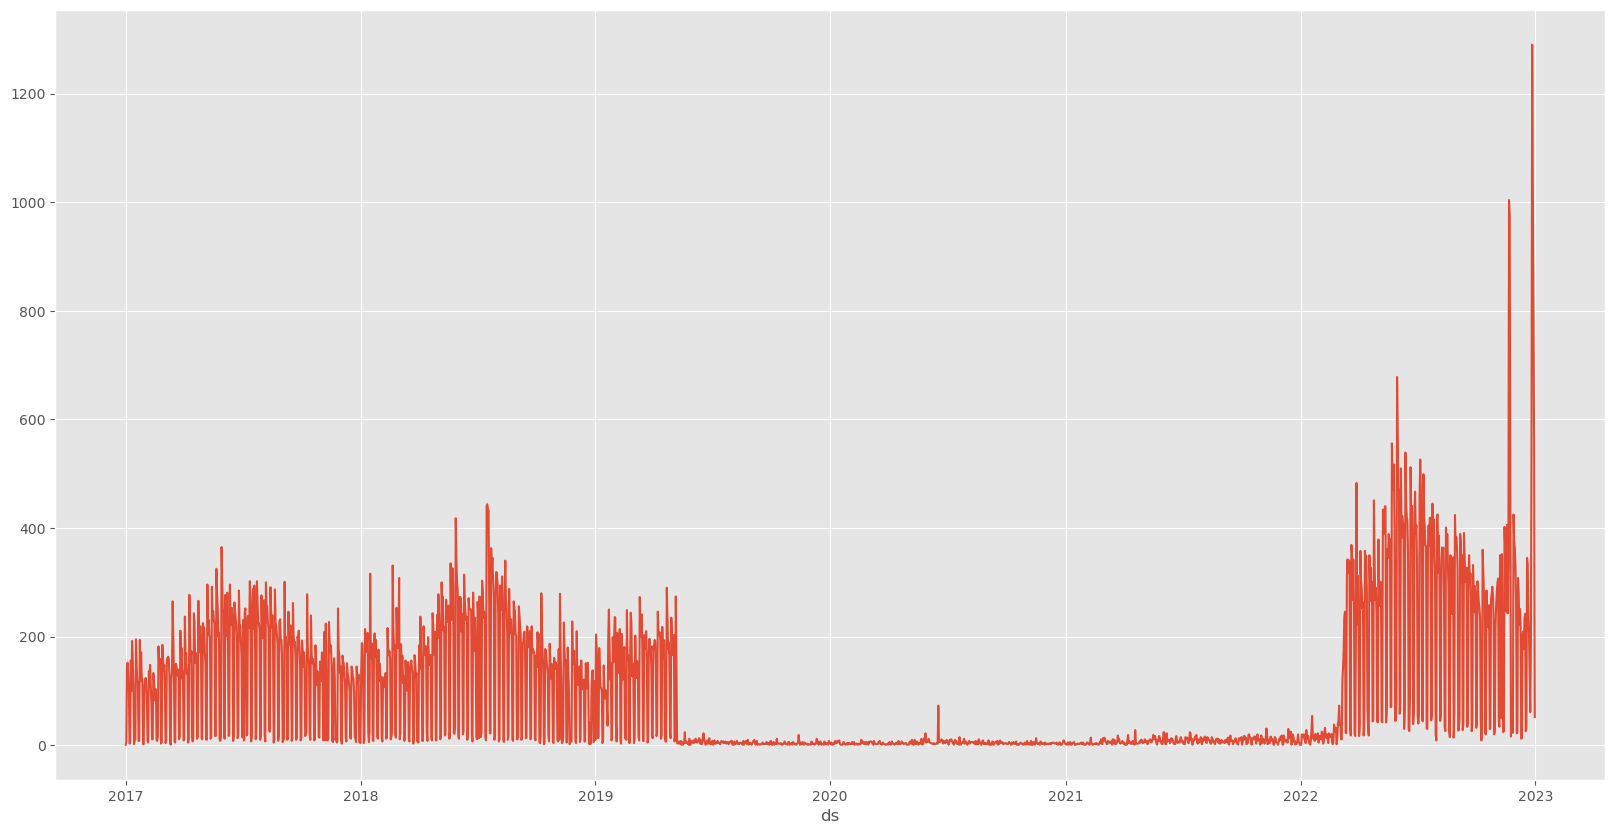

In [10]:
ServiceRequests_df.set_index('ds').y.plot();

Here we can see a steady number of requests from 2017 to mid 2019 with a complete drop off during Covid time which should be expected. Then with a massive uptick in 2022 which also should be expected with all the missed time of fufilling the usual amount of requests

Now on to running the model to forecast 2023

In [11]:
# Instantiate Model
model = Prophet()

# Fit Model
model.fit(ServiceRequests_df)

17:25:29 - cmdstanpy - INFO - Chain [1] start processing
17:25:30 - cmdstanpy - INFO - Chain [1] done processing


We are looking to forecast for the full 2023 year so we'll need to add 12 periods of dates on the month frequency ot the data

In [12]:
future_311 = model.make_future_dataframe(periods=365, freq = 'd')
future_311.tail()

,ds
2473,2023-12-27
2474,2023-12-28
2475,2023-12-29
2476,2023-12-30
2477,2023-12-31


Adding predictions ot the forecasted dataframe

In [13]:
forecast_311 = model.predict(future_311)
forecast_311.tail().T

,2473,2474,2475,2476,2477
ds,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2023-12-30 00:00:00,2023-12-31 00:00:00
trend,602.379858,603.098103,603.816348,604.534593,605.252838
yhat_lower,504.639935,507.382162,493.70617,387.130914,385.06267
yhat_upper,736.882609,730.359589,724.594459,622.479314,632.36079
trend_lower,553.78339,554.351149,554.918907,555.486666,556.054425
trend_upper,650.375335,651.410269,652.445202,653.480136,654.515069
additive_terms,17.362096,15.110095,2.840602,-98.396962,-97.118994
additive_terms_lower,17.362096,15.110095,2.840602,-98.396962,-97.118994
additive_terms_upper,17.362096,15.110095,2.840602,-98.396962,-97.118994
weekly,36.364665,31.997095,17.842289,-85.022987,-85.093871


In [14]:
# These are the few columns we care about from this larger table
forecast_311[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2473,2023-12-27,619.741954,504.639935,736.882609
2474,2023-12-28,618.208198,507.382162,730.359589
2475,2023-12-29,606.656950,493.706170,724.594459
2476,2023-12-30,506.137631,387.130914,622.479314
2477,2023-12-31,508.133844,385.062670,632.360790


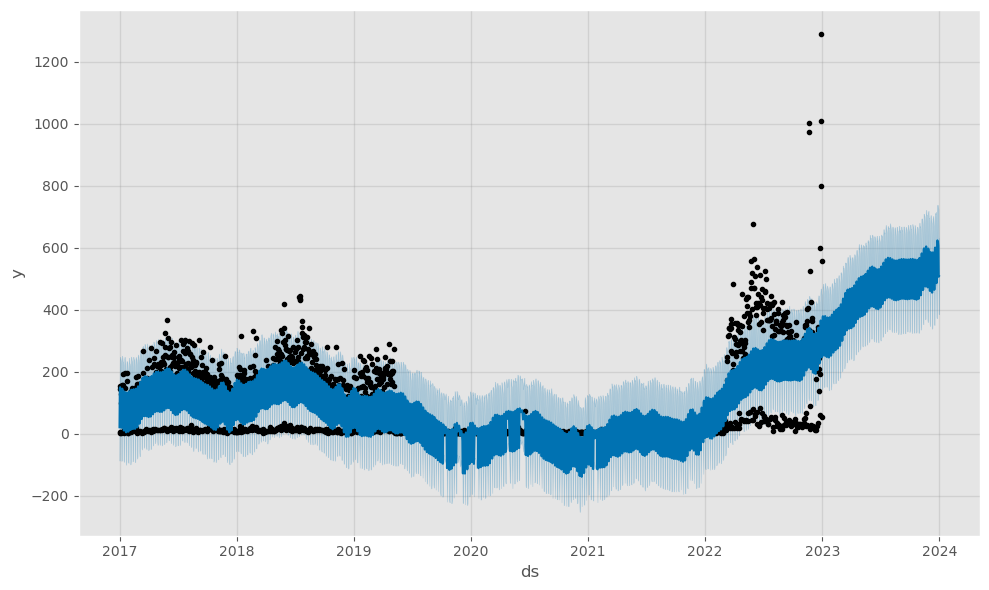

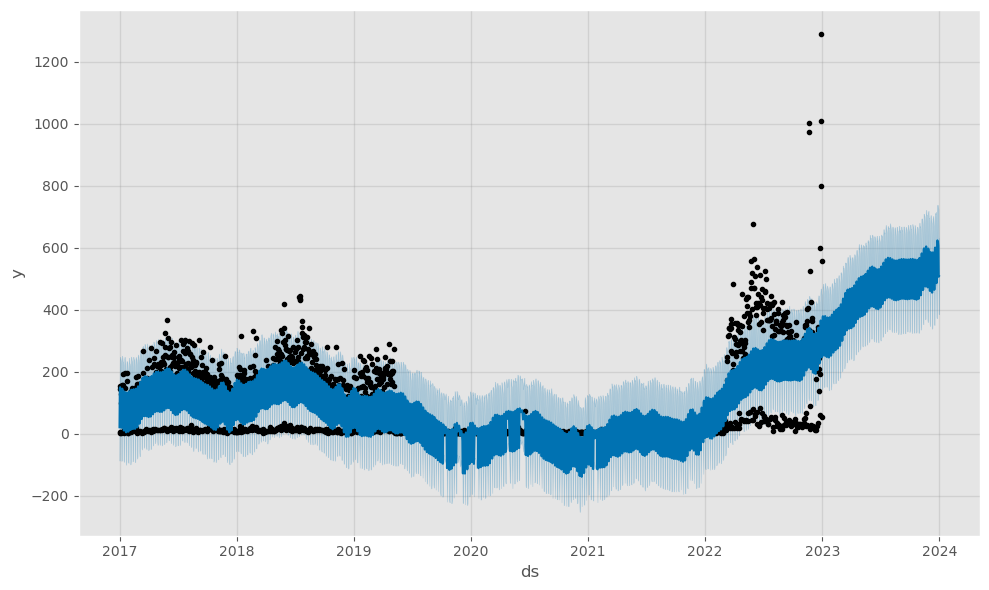

In [15]:
# Plotting the forecast
model.plot(forecast_311)

This model appears to be performing pretty decently. The error of the forecast is a bit wide, but the forecast appears to follow the original trend relatively well.

Lets take a look at the R-squared and Mean squared error

In [16]:
metric_df = pd.concat([forecast_311[['ds','yhat']],ServiceRequests_df['y']], axis=1)
metric_df.head()

,ds,yhat,y
0,2017-01-01,20.386018,1.0
1,2017-01-02,146.633117,6.0
2,2017-01-03,149.721331,143.0
3,2017-01-04,142.736263,152.0
4,2017-01-05,138.098299,129.0


In [17]:
# Dropping the NAs that show up in the 2023 rows as they were predictions
metric_df.dropna(inplace = True)
metric_df.tail()

,ds,yhat,y
2108,2022-12-27,365.120182,1290.0
2109,2022-12-28,360.910432,1009.0
2110,2022-12-29,359.084354,800.0
2111,2022-12-30,347.207535,558.0
2112,2022-12-31,246.337069,52.0


In [18]:
print("R-squared: ", r2_score(metric_df['y'], metric_df['yhat']))
print("Mean Squared Error: ", mean_squared_error(metric_df['y'], metric_df['yhat']))
print("RMSE: ", np.sqrt(mean_squared_error(metric_df['y'], metric_df['yhat'])))

R-squared:  0.6236815807063978
Mean Squared Error:  6370.297423736294
RMSE:  79.8141430057123


This R-Squared metric of .62 is pretty good all things considered, would like to be around .7 or .8 but .62 is totally acceptable, and the MSE confirms this model is likely not too overfit and could be decent at predicting the future

Adding in Holidays to the model

In [19]:
from datetime import date

import holidays

  

# Select country

us_holidays = holidays.UnitedStates(years = [2017,2018,2019,2020,2021,2022])

 

holidays = pd.DataFrame(
    {'holiday': us_holidays.values(),
     'ds': us_holidays.keys(),
     'lower_window': 0,
     'ds_upper': us_holidays.keys(),
     'upper_window': 0},)

holidays

,holiday,ds,lower_window,ds_upper,upper_window
0,New Year's Day,2017-01-01,0,2017-01-01,0
1,New Year's Day (Observed),2017-01-02,0,2017-01-02,0
2,Martin Luther King Jr. Day,2017-01-16,0,2017-01-16,0
3,Washington's Birthday,2017-02-20,0,2017-02-20,0
4,Memorial Day,2017-05-29,0,2017-05-29,0
...,...,...,...,...,...
67,Columbus Day,2022-10-10,0,2022-10-10,0
68,Veterans Day,2022-11-11,0,2022-11-11,0
69,Thanksgiving,2022-11-24,0,2022-11-24,0
70,Christmas Day,2022-12-25,0,2022-12-25,0


In [20]:
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-21', 'lower_window': 0, 'ds_upper': '2020-06-06'},
    {'holiday': 'lockdown_2', 'ds': '2020-07-09', 'lower_window': 0, 'ds_upper': '2020-10-27'},
    {'holiday': 'lockdown_3', 'ds': '2021-02-13', 'lower_window': 0, 'ds_upper': '2021-02-17'},
    {'holiday': 'lockdown_4', 'ds': '2021-05-28', 'lower_window': 0, 'ds_upper': '2021-06-10'},
])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
lockdowns

,holiday,ds,lower_window,ds_upper,upper_window
0,lockdown_1,2020-03-21,0,2020-06-06,77
1,lockdown_2,2020-07-09,0,2020-10-27,110
2,lockdown_3,2021-02-13,0,2021-02-17,4
3,lockdown_4,2021-05-28,0,2021-06-10,13


In [21]:
Holidays = pd.concat([holidays, lockdowns], axis=0).reset_index()
Holidays

,index,holiday,ds,lower_window,ds_upper,upper_window
0,0,New Year's Day,2017-01-01,0,2017-01-01,0
1,1,New Year's Day (Observed),2017-01-02,0,2017-01-02,0
2,2,Martin Luther King Jr. Day,2017-01-16,0,2017-01-16,0
3,3,Washington's Birthday,2017-02-20,0,2017-02-20,0
4,4,Memorial Day,2017-05-29,0,2017-05-29,0
...,...,...,...,...,...,...
71,71,Christmas Day (Observed),2022-12-26,0,2022-12-26,0
72,0,lockdown_1,2020-03-21 00:00:00,0,2020-06-06 00:00:00,77
73,1,lockdown_2,2020-07-09 00:00:00,0,2020-10-27 00:00:00,110
74,2,lockdown_3,2021-02-13 00:00:00,0,2021-02-17 00:00:00,4


In [22]:
Holidays['ds'] = pd.to_datetime(Holidays['ds']).dt.date
Holidays['ds_upper'] = pd.to_datetime(Holidays['ds_upper']).dt.date
Holidays

,index,holiday,ds,lower_window,ds_upper,upper_window
0,0,New Year's Day,2017-01-01,0,2017-01-01,0
1,1,New Year's Day (Observed),2017-01-02,0,2017-01-02,0
2,2,Martin Luther King Jr. Day,2017-01-16,0,2017-01-16,0
3,3,Washington's Birthday,2017-02-20,0,2017-02-20,0
4,4,Memorial Day,2017-05-29,0,2017-05-29,0
...,...,...,...,...,...,...
71,71,Christmas Day (Observed),2022-12-26,0,2022-12-26,0
72,0,lockdown_1,2020-03-21,0,2020-06-06,77
73,1,lockdown_2,2020-07-09,0,2020-10-27,110
74,2,lockdown_3,2021-02-13,0,2021-02-17,4


Going to limit this to only major holidays

In [23]:
Holidays['holiday'].unique()

array(["New Year's Day", "New Year's Day (Observed)",
       'Martin Luther King Jr. Day', "Washington's Birthday",
       'Memorial Day', 'Independence Day', 'Labor Day', 'Columbus Day',
       'Veterans Day', 'Veterans Day (Observed)', 'Thanksgiving',
       'Christmas Day', 'Independence Day (Observed)',
       'Juneteenth National Independence Day',
       'Juneteenth National Independence Day (Observed)',
       'Christmas Day (Observed)', 'lockdown_1', 'lockdown_2',
       'lockdown_3', 'lockdown_4'], dtype=object)

In [24]:
values_to_keep = ["New Year's Day", "Memorial Day", "Independence Day","Labor Day","Thanksgiving","Christmas Day",
                 "lockdown_1","lockdown_2","lockdown_3","lockdown_4"]
Holidays_311 = Holidays[Holidays['holiday'].isin(values_to_keep)]
Holidays_311

,index,holiday,ds,lower_window,ds_upper,upper_window
0,0,New Year's Day,2017-01-01,0,2017-01-01,0
4,4,Memorial Day,2017-05-29,0,2017-05-29,0
5,5,Independence Day,2017-07-04,0,2017-07-04,0
6,6,Labor Day,2017-09-04,0,2017-09-04,0
10,10,Thanksgiving,2017-11-23,0,2017-11-23,0
11,11,Christmas Day,2017-12-25,0,2017-12-25,0
12,12,New Year's Day,2018-01-01,0,2018-01-01,0
15,15,Memorial Day,2018-05-28,0,2018-05-28,0
16,16,Independence Day,2018-07-04,0,2018-07-04,0
17,17,Labor Day,2018-09-03,0,2018-09-03,0


In [25]:
#Now let's set up prophet to model our data using holidays - Instantiate and fit the model
model = Prophet(holidays=Holidays_311,
                weekly_seasonality=False)

model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(ServiceRequests_df)

C:\Users\eberl\anaconda3\lib\site-packages\prophet\forecaster.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.holidays['ds'] = pd.to_datetime(self.holidays['ds'])
17:26:24 - cmdstanpy - INFO - Chain [1] start processing
17:26:25 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
#We've instantiated the model, so now we need to build our future dates to forecast into!
future = model.make_future_dataframe(periods=365, freq = 'd')
future.tail()

#... and then run our future data through prophet's model
forecast = model.predict(future)

forecast.head().T

,0,1,2,3,4
ds,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00
trend,119.836872,119.898126,119.959381,120.020635,120.08189
yhat_lower,-84.286885,-5.534807,-16.591412,-5.976604,-14.712689
yhat_upper,153.355886,223.525138,226.985701,228.758022,221.051529
trend_lower,119.836872,119.898126,119.959381,120.020635,120.08189
trend_upper,119.836872,119.898126,119.959381,120.020635,120.08189
Christmas Day,0.0,0.0,0.0,0.0,0.0
Christmas Day_lower,0.0,0.0,0.0,0.0,0.0
Christmas Day_upper,0.0,0.0,0.0,0.0,0.0
Independence Day,0.0,0.0,0.0,0.0,0.0


In [27]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2473,2023-12-27,586.759985,456.154721,722.559618
2474,2023-12-28,594.705056,470.694840,734.260601
2475,2023-12-29,600.481411,468.727177,734.383236
2476,2023-12-30,602.092780,472.782909,730.044767
2477,2023-12-31,600.195651,471.222978,741.903170


Visualizing the model with holidays added

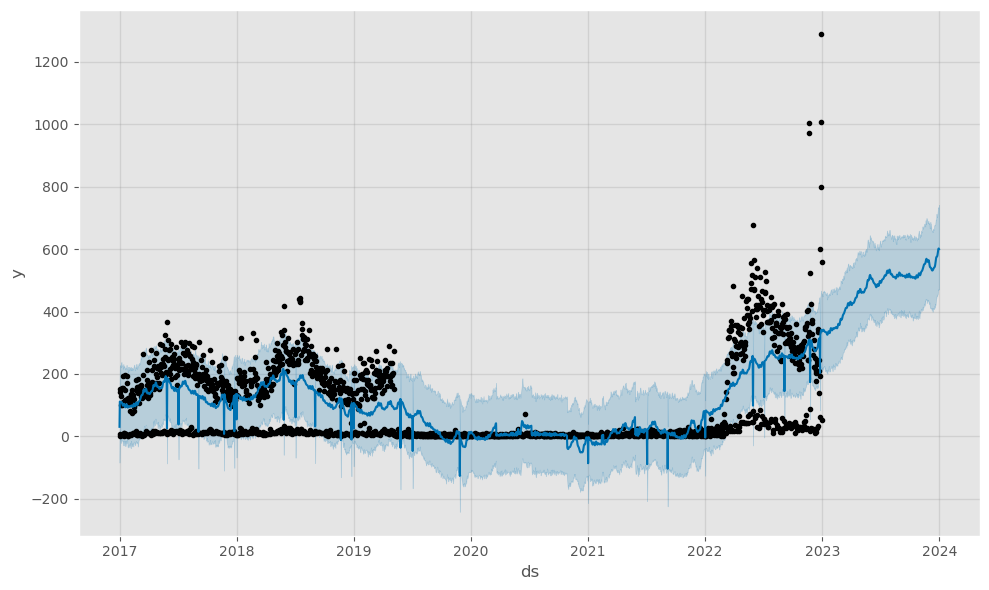

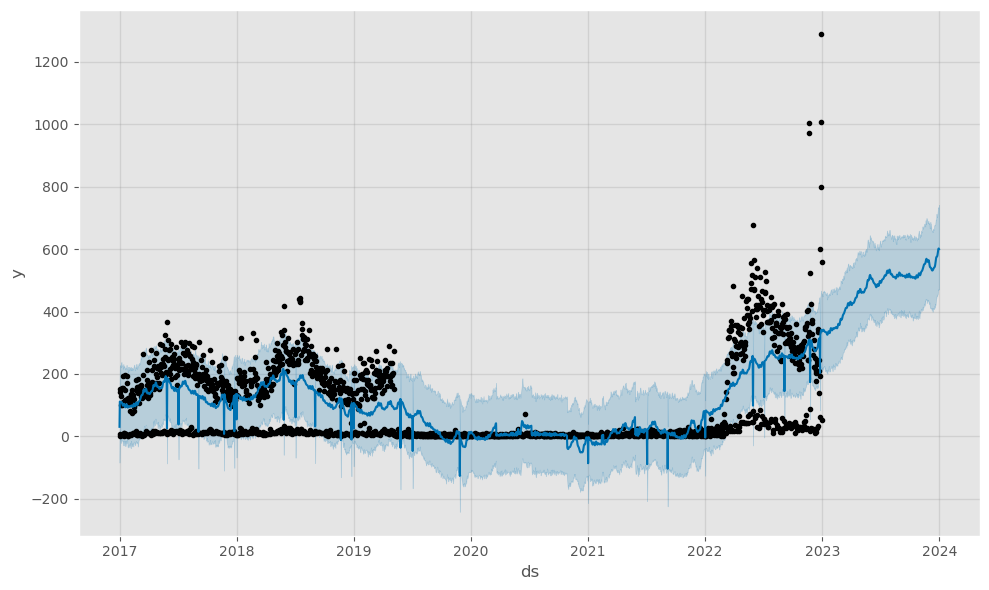

In [28]:
model.plot(forecast)

Adding the holidays in added at first glance appears to have reigned things, lets see if the R-Squared and MSE metrics have imporoved with holidays added

In [29]:
metric_df = pd.concat([forecast[['ds','yhat']],ServiceRequests_df['y']], axis=1)
metric_df.head()

,ds,yhat,y
0,2017-01-01,30.362801,1.0
1,2017-01-02,111.220247,6.0
2,2017-01-03,110.259793,143.0
3,2017-01-04,109.858346,152.0
4,2017-01-05,109.843039,129.0


In [30]:
# Dropping the NAs that show up in the 2023 rows as they were predictions
metric_df.dropna(inplace = True)
metric_df.tail()

,ds,yhat,y
2108,2022-12-27,333.557674,1290.0
2109,2022-12-28,339.558235,1009.0
2110,2022-12-29,341.419067,800.0
2111,2022-12-30,339.790489,558.0
2112,2022-12-31,337.270779,52.0


In [31]:
print("R-squared: ", r2_score(metric_df['y'], metric_df['yhat']))
print("Mean Squared Error: ", mean_squared_error(metric_df['y'], metric_df['yhat']))
print("RMSE: ", np.sqrt(mean_squared_error(metric_df['y'], metric_df['yhat'])))

R-squared:  0.467460878885292
Mean Squared Error:  9014.79283858559
RMSE:  94.94626289952433


Adding in the holidays, even accounting for mormalizing the dips seen from the lockdown dates, seems to have weakened overall performance, possibly do to the seasonailty of the given holidays

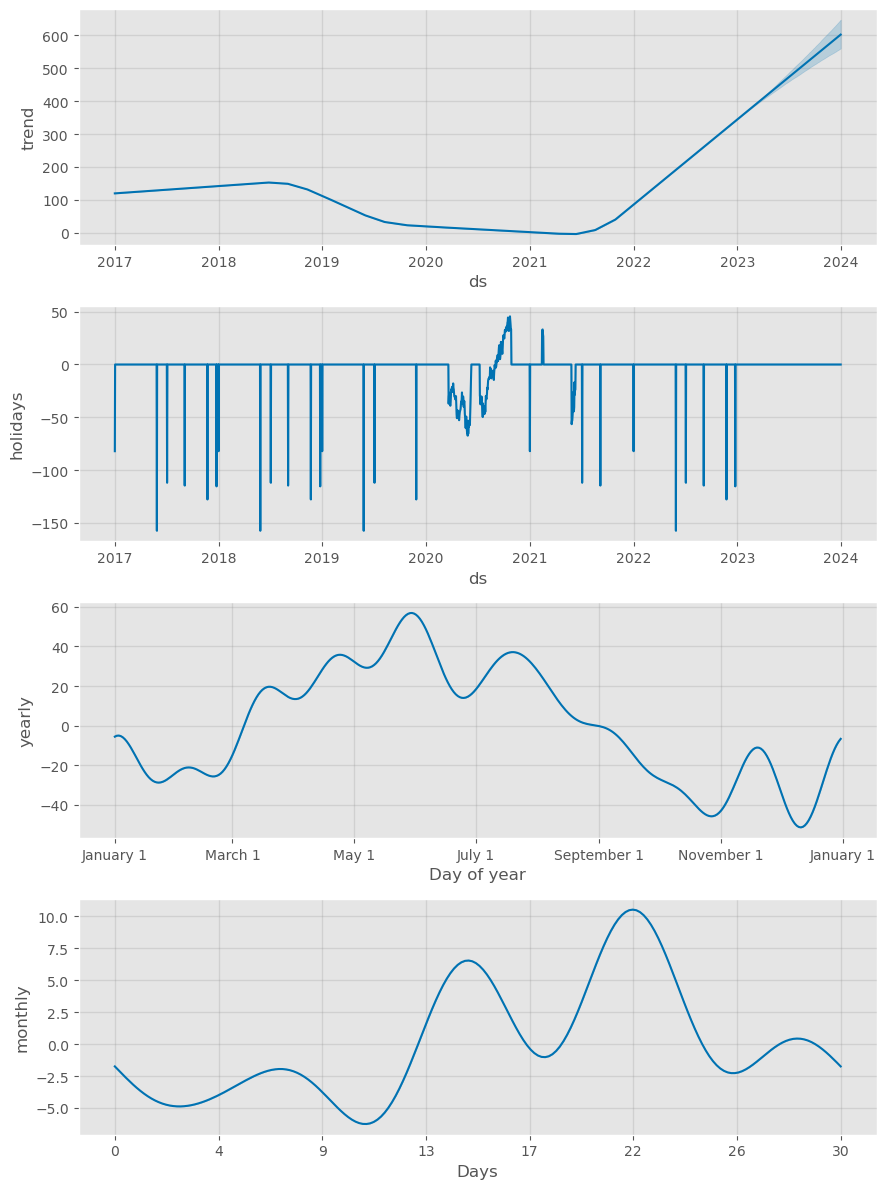

In [32]:
# View the components
model.plot_components(forecast);

ARIMA Forecast

In [33]:
!pip3 install pmdarima
!pip install statsmodels

import statsmodels.api
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

     -------------------------------------- 572.7/572.7 kB 3.6 MB/s eta 0:00:00


In [48]:
from pmdarima import auto_arima
# Ignore  warnings
import warnings
warnings.filterwarnings('ignore')

In [34]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print('1. ADF : ', dftest[0])
    print('2. P-Value : ', dftest[1])
    print('3. Num Of Lags : ', dftest[2])
    print('4. Num Of Observations Used For ADF Regression and Critical Values Calculation : ', dftest[3])
    print('5. Critical Values : ')
    for key, val in dftest[4].items():
        print('\t', key, ':',val)

In [35]:
ad_test(ServiceRequests_df['y'])

1. ADF :  -0.5910585458503697
2. P-Value :  0.8729896560515267
3. Num Of Lags :  26
4. Num Of Observations Used For ADF Regression and Critical Values Calculation :  2086
5. Critical Values : 
	 1% : -3.433488717753819
	 5% : -2.862926547902014
	 10% : -2.5675081335553003


In [38]:
ServiceRequests_df = ServiceRequests_df.set_index('ds')
ServiceRequests_df

,y
ds,
2017-01-01,1
2017-01-02,6
2017-01-03,143
2017-01-04,152
2017-01-05,129
...,...
2022-12-27,1290
2022-12-28,1009
2022-12-29,800


In [44]:
ServiceRequests_df.index = pd.to_datetime(ServiceRequests_df.index)
ServiceRequests_df

,y
ds,
2017-01-01,1
2017-01-02,6
2017-01-03,143
2017-01-04,152
2017-01-05,129
...,...
2022-12-27,1290
2022-12-28,1009
2022-12-29,800


Spliting the data into training and testing sets, Blue past the dashes shows the 2023 forecast

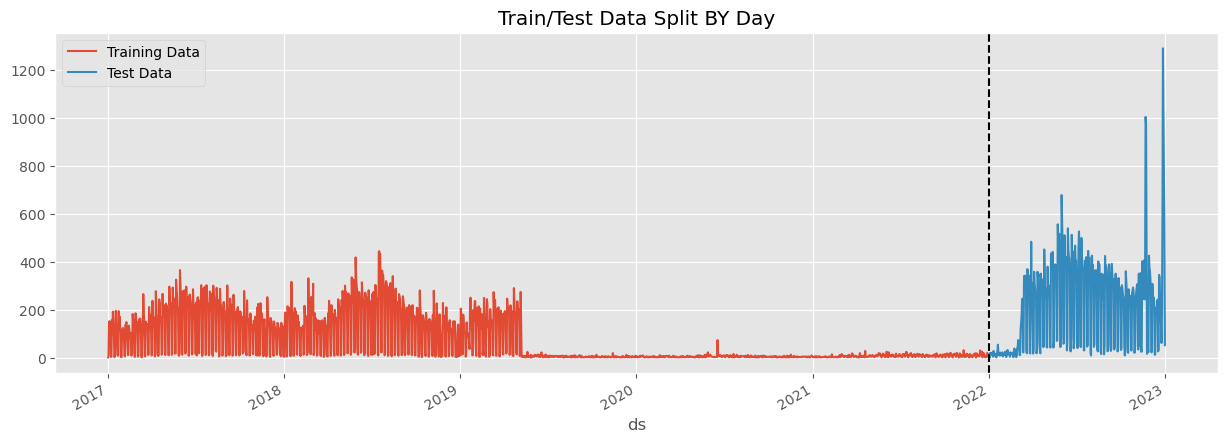

In [62]:
split_date = '1-jan-2022'
df_train_day = ServiceRequests_df.loc[ServiceRequests_df.index <= split_date].copy()
df_test_day = ServiceRequests_df.loc[ServiceRequests_df.index > split_date].copy()

fig, ax = plt.subplots(figsize=(15,5))
df_train_day.plot(ax=ax, label='Training Data', title='Train/Test Data Split BY Day')
df_test_day.plot(ax=ax, label='Testing Data')
ax.axvline(split_date, color='black', ls='--')
ax.legend(['Training Data', 'Test Data'])
plt.show()

In [46]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api
import statsmodels.formula.api as smf

In [49]:
stepwise_fit = auto_arima(ServiceRequests_df['y'],
                          trace=True,
                          supress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=24410.674, Time=2.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25502.472, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25499.079, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25198.836, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25500.473, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=24634.151, Time=1.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=24562.834, Time=1.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=24550.849, Time=2.95 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=24069.792, Time=4.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=24633.002, Time=2.43 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=24049.406, Time=4.30 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=23643.565, Time=4.50 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=23825.526, Time=4.74 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=23488.128, Time=5.74 sec
 ARIMA(5,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2113
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -11562.433
Date:                Wed, 10 May 2023   AIC                          23148.866
Time:                        18:06:11   BIC                          23216.731
Sample:                             0   HQIC                         23173.716
                               - 2113                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8712      0.695      1.254      0.210      -0.491       2.233
ar.L1          0.8807      0.026     33.441      0.000       0.829       0.932
ar.L2         -1.5062      0.021    -70.888      0.000      -1.548      -1.465
ar.L3          0.9233      0.037     24.672      0.000       0.850       0.997
ar.L4         -1.0592      0.022    -49.118      0.000      -1.101      -1.017
ar.L5          0.0864      0.026      3.355      0.001       0.036       0.137
ma.L1         -1.4915      0.024    -63.040      0.000      -1.538      -1.445
ma.L2          1.8363      0.030     60.462      0.000       1.777       1.896
ma.L3         -1.7139      0.034    -50.694      0.000      -1.780      -1.648
ma.L4          1.3203      0.028     46.976      0.000       1.265       1.375
ma.L5         -0.6400      0.020    -32.552      0.000      -0.679      -0.601
sigma2      4187.9168     52.860     79.226      0.000    4084.313    4291.521
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):            124628.16
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                             2.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Fitting the ARIMA model to the data set

In [50]:
model_day=sm.tsa.ARIMA(df_train_day['y'], order=(5,1,5))
model_day=model_day.fit()
model_day.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2113
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -11567.077
Date:                Wed, 10 May 2023   AIC                          23156.153
Time:                        18:06:34   BIC                          23218.363
Sample:                             0   HQIC                         23178.932
                               - 2113                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9637      0.028     34.278      0.000       0.909       1.019
ar.L2         -1.5717      0.023    -69.027      0.000      -1.616      -1.527
ar.L3          1.0416      0.039     26.439      0.000       0.964       1.119
ar.L4         -1.1177      0.024    -47.116      0.000      -1.164      -1.071
ar.L5          0.1613      0.027      5.971      0.000       0.108       0.214
ma.L1         -1.5118      0.024    -61.939      0.000      -1.560      -1.464
ma.L2          1.8701      0.029     65.186      0.000       1.814       1.926
ma.L3         -1.7690      0.031    -57.487      0.000      -1.829      -1.709
ma.L4          1.3436      0.029     46.860      0.000       1.287       1.400
ma.L5         -0.6457      0.020    -31.714      0.000      -0.686      -0.606
sigma2      4196.0714     52.449     80.003      0.000    4093.274    4298.869
===================================================================================
Ljung-Box (L1) (Q):                   4.03   Jarque-Bera (JB):             96846.53
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                             1.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
start=len(df_train_day)
end=len(df_train_day)+len(df_test_day)-1
pred_day=model_day.predict(start=start, end=end, typ='levels')
#print(pred) # dates did not appear do use next line of code
pred_day.index=ServiceRequests_df.index[start:end+1]
print(pred_day)

ds
2022-01-02      4.753438
2022-01-03      3.128474
2022-01-04     17.525672
2022-01-05     15.725519
2022-01-06      9.138481
                 ...    
2022-12-27    472.850173
2022-12-28    648.728597
2022-12-29    599.955339
2022-12-30    502.661295
2022-12-31    243.876408
Name: predicted_mean, Length: 363, dtype: float64


<AxesSubplot:xlabel='ds'>

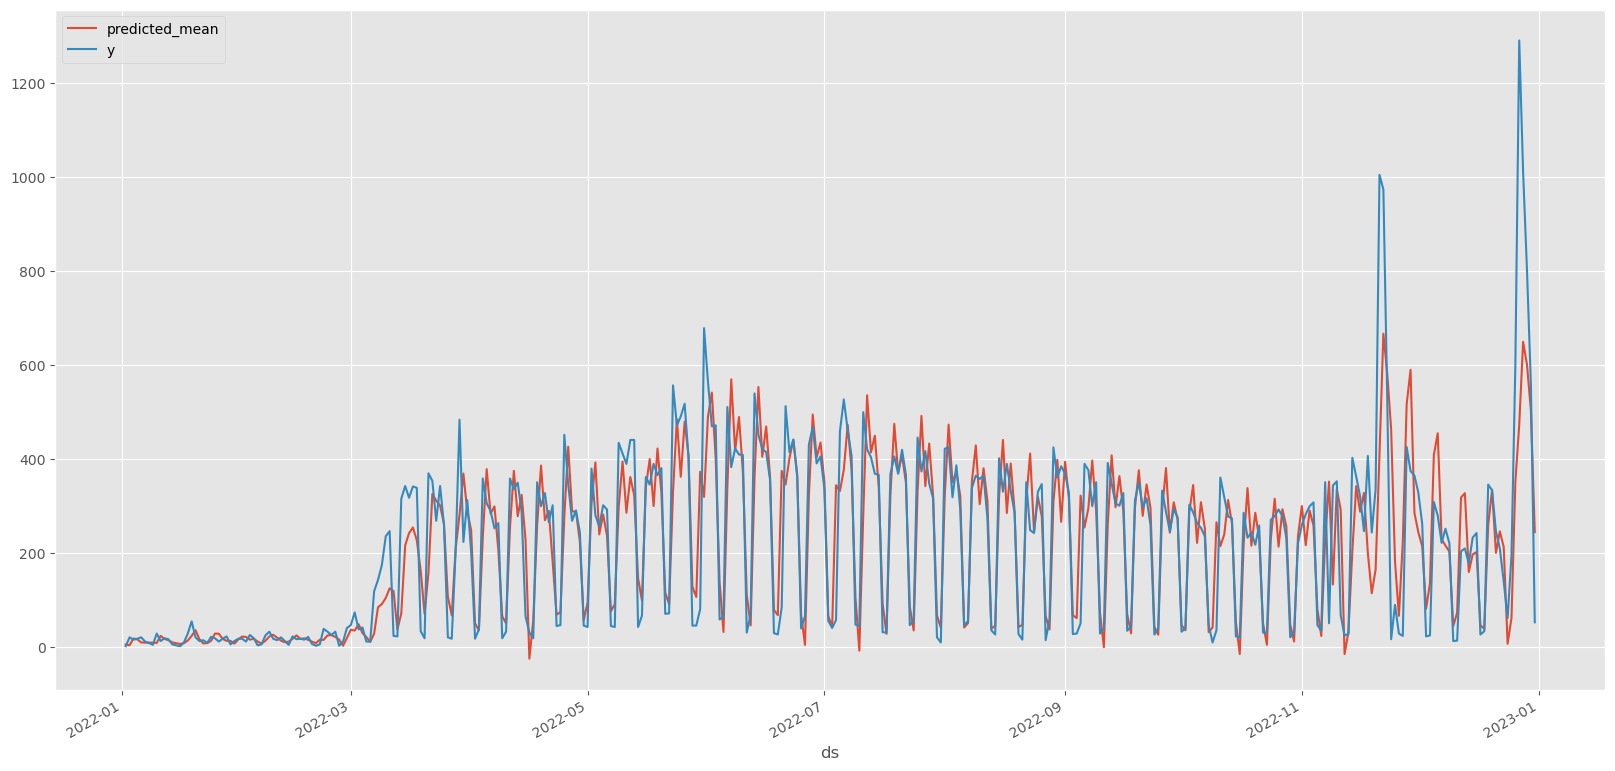

In [64]:
pred_day.plot(legend=True)
df_test_day['y'].plot(legend=True)

In [65]:
ServiceRequests_df['y'].mean()

94.65215333648841

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_day=sqrt(mean_squared_error(pred_day, df_test_day['y']))
rmse_day

105.02879969454618

In [69]:
model_day = sm.tsa.ARIMA(ServiceRequests_df['y'], order=(5,0,5))
model_day=model_day.fit()
ServiceRequests_df # predict into the future after training

,y
ds,
2017-01-01,1
2017-01-02,6
2017-01-03,143
2017-01-04,152
2017-01-05,129
...,...
2022-12-27,1290
2022-12-28,1009
2022-12-29,800


In [73]:
index_future_dates=pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
pred_day=model_day.predict(start=len(ServiceRequests_df), end=len(ServiceRequests_df)+(364), type='levels').rename('ARIMA Predictions BY Day')
pred_day.index=index_future_dates
print(pred_day)

2023-01-01    231.409409
2023-01-02    628.068502
2023-01-03    850.877324
2023-01-04    775.316221
2023-01-05    672.527495
                 ...    
2023-12-27    651.686532
2023-12-28    503.685773
2023-12-29    312.512933
2023-12-30    225.356270
2023-12-31    481.876548
Freq: D, Name: ARIMA Predictions BY Day, Length: 365, dtype: float64


<AxesSubplot:>

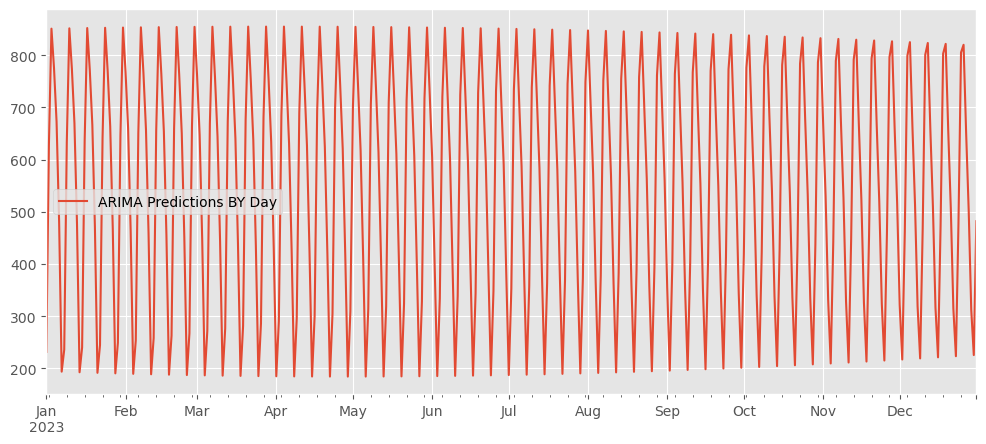

In [74]:
pred_day.plot(figsize=(12,5),legend=True)

Above shows the ARIMA model trend of the predicted 2023 request counts, clearly fluctuating with no real pattern of any sort